In [42]:
#from plotly import express, graph_objects

In [12]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [65]:
! pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.0-cp39-cp39-win_amd64.whl (36.9 MB)
  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
     ---------------------------------------- 3.3/3.3 MB 95.6 kB/s eta 0:00:00
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached kiwisolver-1.4.2-cp39-cp39-win_amd64.whl (55 kB)


In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [6]:
cleaned_data = pd.read_csv("data/cleaned/terror.csv")

In [ ]:
cleaned_data

,iyear,iday,imonth,nkill,country_txt,nwound,region_txt,provstate,city,nkillus,...,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,claimmode_txt,propextent_txt,propextent,propvalue,dbsource
0,1970,2,7,1.0,Dominican Republic,0.0,Central America & Caribbean,'',Santo Domingo,0.0,...,Named Civilian,'','','','','','',0.0,0.0,PGIS
1,1970,0,0,0.0,Mexico,0.0,North America,Federal,Mexico city,0.0,...,"Diplomatic Personnel (outside of embassy, cons...",'','','','','','',0.0,0.0,PGIS
2,1970,0,1,1.0,Philippines,0.0,Southeast Asia,Tarlac,Unknown,0.0,...,Radio Journalist/Staff/Facility,'','','','','','',0.0,0.0,PGIS
3,1970,0,1,0.0,Greece,0.0,Western Europe,Attica,Athens,0.0,...,Embassy/Consulate,'','','','','','',0.0,0.0,PGIS
4,1970,0,1,0.0,Japan,0.0,East Asia,Fukouka,Fukouka,0.0,...,Embassy/Consulate,'','','','','','',0.0,0.0,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,31,12,1.0,Somalia,2.0,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,0.0,...,Military Checkpoint,'','','','',Unknown,'',0.0,0.0,START Primary Collection
181687,2017,31,12,2.0,Syria,7.0,Middle East & North Africa,Lattakia,Jableh,0.0,...,Military Barracks/Base/Headquarters/Checkpost,'','','','','',Unknown,4.0,-99.0,START Primary Collection
181688,2017,31,12,0.0,Philippines,0.0,Southeast Asia,Maguindanao,Kubentog,0.0,...,House/Apartment/Residence,'','','','','',Unknown,4.0,-99.0,START Primary Collection
181689,2017,31,12,0.0,India,0.0,South Asia,Manipur,Imphal,0.0,...,Government Building/Facility/Office,'','','','','','',0.0,0.0,START Primary Collection


#### Colonnes que nous analyserons
1. nkill : nombre de personnes tuées lors d'attentats terroristes
2. nwound : nombre de personnes blessées lors d'attentats terroristes
3. attacktype_txt : type d'attaque
4. weapsubtype1_txt : type d'armes utilisées lors des attaques
5. targsubtype1_txt : Type de cibles
6. régions : noms de régions
7. country_txt : noms de pays

__Visualiser le nombre d’attaques terroristes accompagnées de suicides par année__

In [27]:
num_attack=cleaned_data.groupby(['iyear','suicide']).size().reset_index(name='NombreAttaque')

In [28]:
num_attack.head()

,iyear,suicide,NombreAttaque
0,1970,0,651
1,1971,0,471
2,1972,0,568
3,1973,0,473
4,1974,0,581


In [32]:
num_attack=num_attack[num_attack['suicide'].isin([1])]
num_attack

,iyear,suicide,NombreAttaque
12,1981,1,1
14,1982,1,1
16,1983,1,5
18,1984,1,2
20,1985,1,16
22,1986,1,3
24,1987,1,3
26,1988,1,2
28,1989,1,3
30,1990,1,2


In [33]:
bar_fig1=px.bar(num_attack,x='iyear',y='NombreAttaque',color='NombreAttaque',title=" Diagramme en barre du nombre d’attaques terroristes accompagnées de suicides par année")
bar_fig1.show()

__Visualiser l'évolution annuel (animation par année) du nombre d'attaques terroristes par type d’attaque et par mois__

In [8]:
attaque_type_month=cleaned_data.groupby(['iyear','imonth','attacktype1_txt']).size().reset_index(name='NombreAttaqueTypeMois')
attaque_type_month

,iyear,imonth,attacktype1_txt,NombreAttaqueTypeMois
0,1970,0,Hostage Taking (Kidnapping),1
1,1970,1,Armed Assault,4
2,1970,1,Assassination,3
3,1970,1,Bombing/Explosion,15
4,1970,1,Facility/Infrastructure Attack,13
...,...,...,...,...
4160,2017,12,Hijacking,1
4161,2017,12,Hostage Taking (Barricade Incident),4
4162,2017,12,Hostage Taking (Kidnapping),58
4163,2017,12,Unarmed Assault,5


In [59]:
! pip install plotly --upgrade --quiet

In [66]:
! pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 73.3/73.3 kB 237.1 kB/s eta 0:00:00
     -------------------------------------- 72.9/72.9 kB 267.6 kB/s eta 0:00:00
     -------------------------------------- 61.6/61.6 kB 253.0 kB/s eta 0:00:00
     -------------------------------------- 60.6/60.6 kB 247.9 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [52]:
bar_fig2=px.line(attaque_type_month,x='imonth',y='NombreAttaqueTypeMois',color='attacktype1_txt',animation_frame='iyear',title=" Courbe d'évolution annuel (animation par année) du nombre d'attaques terroristes par type d’attaque et par mois")
bar_fig2.show()

__Visualiser la répartition géographique du nombre d’attaques terroristes accompagnés de suicide par pays__

In [34]:
attaque_suicide_pays=cleaned_data.groupby(['country_txt','suicide']).size().reset_index(name='AttaqueSuicidePays')
attaque_suicide_pays

,country_txt,suicide,AttaqueSuicidePays
0,Afghanistan,0,11503
1,Afghanistan,1,1228
2,Albania,0,80
3,Algeria,0,2710
4,Algeria,1,33
...,...,...,...
266,Yemen,1,220
267,Yugoslavia,0,203
268,Zaire,0,50
269,Zambia,0,62


In [36]:
attaque_suicide_pays=attaque_suicide_pays[attaque_suicide_pays['suicide'].isin([1])]
attaque_suicide_pays

,country_txt,suicide,AttaqueSuicidePays
1,Afghanistan,1,1228
4,Algeria,1,33
9,Argentina,1,2
12,Australia,1,1
15,Azerbaijan,1,1
...,...,...,...
250,United Kingdom,1,7
252,United States,1,14
255,Uzbekistan,1,6
262,West Bank and Gaza Strip,1,66


In [40]:
bar_fig3=px.bar(attaque_suicide_pays,x='country_txt',y='AttaqueSuicidePays',color='country_txt',title=" Diagramme en barre de la répartition géographique du nombre d’attaques terroristes accompagnés de suicide par pays")
bar_fig3.show()

Visualiser la répartition géographique du nombre d’attaques avec demande de rançons par pays

In [37]:
attaque_ranc_pays=cleaned_data.groupby(['country_txt','ransompaid']).size().reset_index(name='AttaqueRanconPays')

attaque_ranc_pays=attaque_ranc_pays[attaque_ranc_pays['ransompaid']>0]

attaque_ranc_pays

,country_txt,ransompaid,AttaqueRanconPays
2,Afghanistan,4314.00,1
3,Afghanistan,10000.00,1
4,Afghanistan,38169.76,1
8,Algeria,66000.00,1
9,Algeria,78600.00,1
...,...,...,...
425,Venezuela,1400000.00,1
426,Venezuela,2000000.00,1
431,West Germany (FRG),40000.00,1
435,Yemen,237262.20,1


In [38]:
bar_fig4=px.bar(attaque_ranc_pays,x='country_txt',y='AttaqueRanconPays',color='country_txt',title=" Diagramme en barre de la répartition géographique du nombre d’attaques terroristes aavec demande de rançonpar pays")
bar_fig4.show()

__Visualiser la corrélation entre différentes variables en relation directe avec le terrorisme__

In [35]:
terro_qual = [ 'region_txt', 'provstate',
                          'attacktype1_txt', 'alternative_txt','hostkidoutcome_txt'
                         , 'ransomnote', 'summary', 'motive', 'gname'
                         , 'natlty1_txt', 'kidhijcountry', 'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt'
                         , 'weaptype4_txt', 'weapsubtype4_txt', 'targtype1_txt', 'targsubtype1_txt', 'targtype2_txt', 'targsubtype2_txt', 'targtype3_txt', 'targsubtype3_txt'
                         , 'claimmode_txt', 'propextent_txt'
            ]
terro_quant = [ 'nkill', 'nwound',
                          'nkillus', 'nwoundus',
                          'suicide', 'ransompaid', 'nhostkid', 
                         'ransompaidus', 'nhostkidus', 'propextent', 'propvalue'
                         ]

cor_var=cleaned_data[terro_quant]

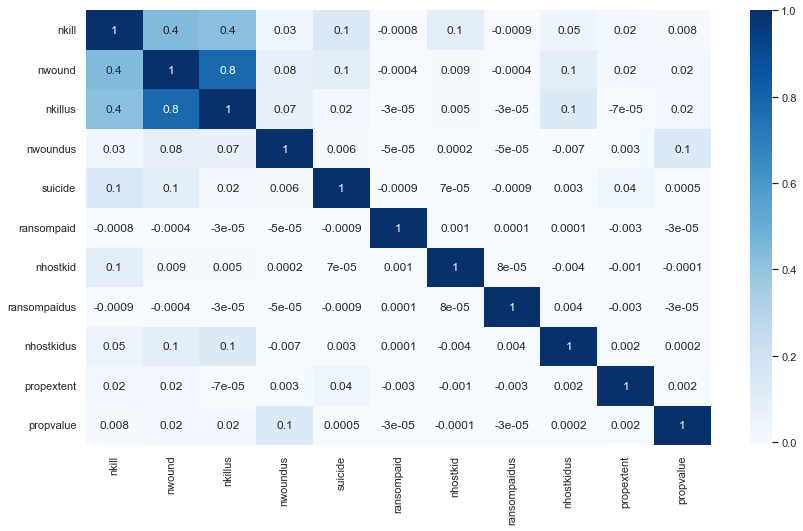

In [36]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = cor_var.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


nkilus et nwound sont très corrélées